In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()

In [41]:
digits.data    # array of flattened images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [42]:
digits.data.shape

(1797, 64)

In [43]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

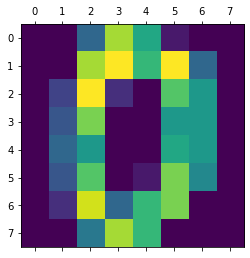

In [45]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[0])    # image[0] :    64 --> 8X8

In [46]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= .3)

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9611111111111111

In [49]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9925925925925926

In [50]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9703703703703703

In [51]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)   # n_splits = no. of folds
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [52]:
for train_index, test_index in kf.split(['a','b','c','d','e','f','g','h','i']):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [53]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [54]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index, test_index in kf.split(digits.data):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=50), X_train, X_test, y_train, y_test))

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [55]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [56]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [57]:
scores_rf

[0.9348914858096828, 0.9582637729549248, 0.9248747913188647]

In [58]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=3)
skfold

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [59]:
scores_l=[]
score_svm=[]
scores_rf=[]

for train_index, test_index in skfold.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=50), X_train, X_test, y_train, y_test))

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [60]:
scores_l

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [61]:
score_svm

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [62]:
scores_rf

[0.9315525876460768, 0.9515859766277128, 0.9298831385642737]

In [21]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(LogisticRegression(), digits.data, digits.target, cv=3)

C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

array([0.92153589, 0.94156928, 0.91652755])

In [24]:
cross_val_score(SVC(), digits.data, digits.target, cv=3)

array([0.96494157, 0.97996661, 0.96494157])

In [25]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target, cv=3)

array([0.94156928, 0.94323873, 0.92821369])

In [ ]:
# -----------------------------------------   pay attention  --------------------------------------------------------

In [85]:
arr=np.array([1,2,3,4,5,6,7,8,9,10])
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [89]:
arr[[1,2,5,6]]

array([2, 3, 6, 7])